In [1]:
! pip install pmdarima

You should consider upgrading via the 'C:\Users\Ruben\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import pmdarima as pmd
import numpy as np
from pmdarima.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('./data/serie-storiche-ecommerce-pulito-no-buchi-temporali.csv')
dataset = dataset.sort_values(by='data')
dataset = dataset[dataset.totale != 0.0]

In [3]:
import plotly.express as px
fig = px.line(dataset, x='data', y='totale')
fig.show()

In [4]:
dataset.head()
filtered_data = dataset[[ 'totale']]

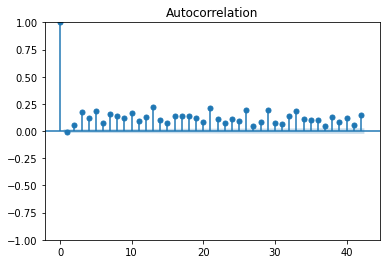

In [5]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(filtered_data)
pyplot.show()

c:\Users\Ruben\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



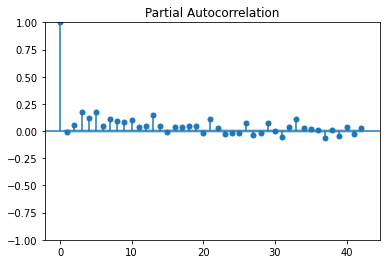

In [6]:
plot_pacf(filtered_data)
pyplot.show()

In [7]:
arima_dataset = dataset[["totale"]]

In [8]:
train, test = train_test_split(arima_dataset, train_size=0.9)


In [9]:
arima_model = pmd.auto_arima(train, start_p=0, start_q=1, start_P=0, start_Q=1,max_p=4,max_q=4, max_P=4, max_Q=4, test="adf", seasonal=True,m=13,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,1)(0,0,1)[13] intercept   : AIC=278107.867, Time=1.94 sec
 ARIMA(0,0,0)(0,0,0)[13] intercept   : AIC=278588.897, Time=0.14 sec
 ARIMA(1,0,0)(1,0,0)[13] intercept   : AIC=278070.120, Time=2.35 sec
 ARIMA(0,0,0)(0,0,0)[13]             : AIC=283794.607, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[13] intercept   : AIC=278589.317, Time=0.31 sec
 ARIMA(1,0,0)(2,0,0)[13] intercept   : AIC=277957.759, Time=8.62 sec
 ARIMA(1,0,0)(3,0,0)[13] intercept   : AIC=277954.191, Time=32.61 sec
 ARIMA(1,0,0)(4,0,0)[13] intercept   : AIC=277914.564, Time=57.55 sec
 ARIMA(1,0,0)(4,0,1)[13] intercept   : AIC=277639.360, Time=117.09 sec
 ARIMA(1,0,0)(3,0,1)[13] intercept   : AIC=inf, Time=93.28 sec
 ARIMA(1,0,0)(4,0,2)[13] intercept   : AIC=277642.032, Time=221.77 sec
 ARIMA(1,0,0)(3,0,2)[13] intercept   : AIC=277639.083, Time=76.97 sec
 ARIMA(1,0,0)(2,0,2)[13] intercept   : AIC=277714.182, Time=28.52 sec
 ARIMA(1,0,0)(3,0,3)[13] intercept   : AIC=277640.840, Tim

MemoryError: Unable to allocate 278. MiB for an array with shape (54, 54, 12481) and data type float64

Best model (2,0,0)(3,0,1)

In [15]:
test["SARIMA"] = arima_model.predict(n_periods=len(test))
test.head(10)

,totale,SARIMA
11797,21881.12,12249.803892
5735,7794.02,12249.803892
11798,6999.89,12249.803892
8767,6512.49,12249.803892
2705,16153.77,12249.803892
5737,6951.58,12249.803892
11799,9219.65,12249.803892
2706,15043.61,12249.803892
14830,476.21,12249.803892
8768,6255.69,12249.803892


In [10]:
def mean_absolute_percentage_error(y_true, y_pred): 

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [12]:
print(mean_absolute_percentage_error(test["totale"], test["SARIMA"]))

246.85527643679106


In [ ]:
import plotly.express as px
fig = px.line(test, x='data', y=['totale',"ARIMA"])
fig.show()